## Task 4: Location-Based Analysis

### Objective
The goal of this task is to analyze the geographical distribution of restaurants
and understand how location influences restaurant concentration, ratings, and
pricing patterns. This analysis helps uncover regional trends and business insights
related to the food industry.

## Load Dataset

In [21]:
import pandas as pd
df = pd.read_csv("Dataset.csv")

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [22]:
df.shape

(9551, 21)

In [23]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## EDA

In [25]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [26]:
df = df.dropna(subset=['Cuisines']) #Dropping the missing 9 rows 

In [27]:
df['City'] = df['City'].str.strip()
df['Locality'] = df['Locality'].str.strip()

## 1. Top Cities by Restaurant Concentration

In [28]:
city_counts = df['City'].value_counts()
city_counts.head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Ahmedabad         21
Lucknow           21
Guwahati          21
Amritsar          21
Name: count, dtype: int64

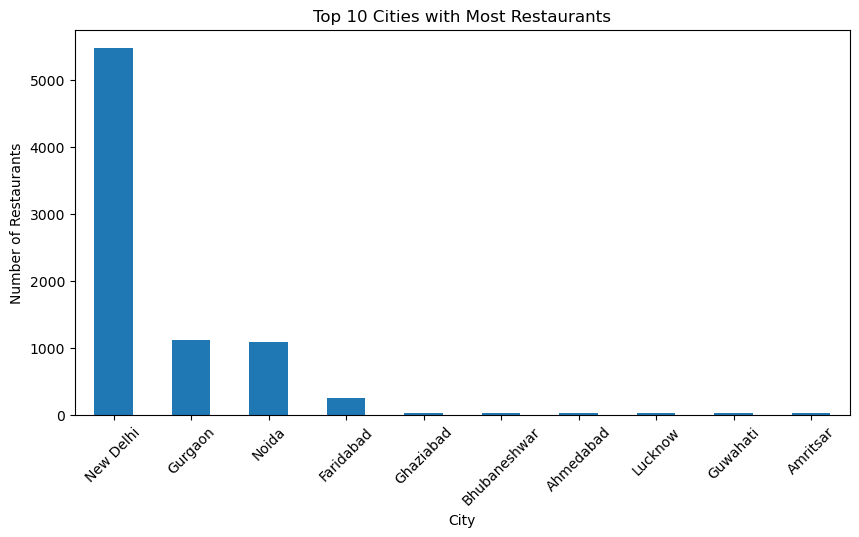

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
city_counts.head(10).plot(kind='bar')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

## 2. Average Restaurant Rating Across Cities

In [30]:
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating_city.head(10)

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Lincoln             4.500000
Tagaytay City       4.500000
Name: Aggregate rating, dtype: float64

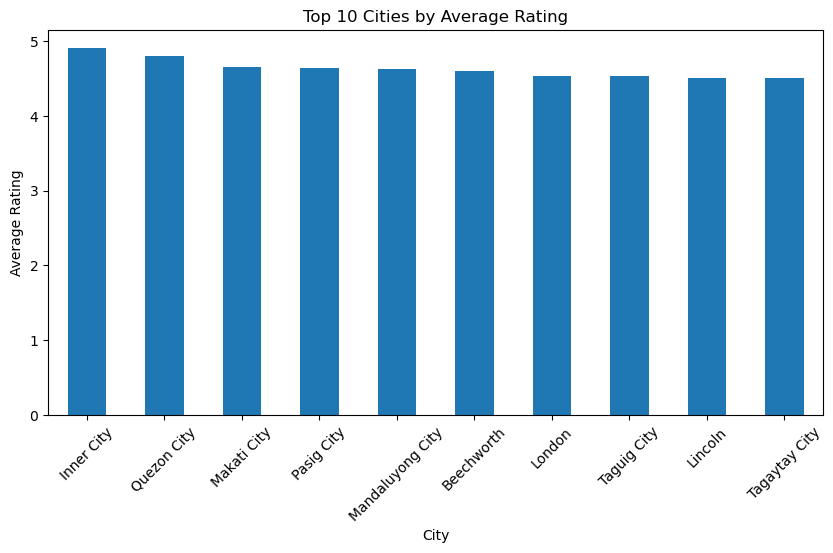

In [31]:
plt.figure(figsize=(10,5))
avg_rating_city.head(10).plot(kind='bar')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

## 3. Average Price Range Distribution by City

In [32]:
avg_price_city = df.groupby('City')['Price range'].mean().sort_values(ascending=False)
avg_price_city.head(10)

City
Vineland Station    4.000000
Paynesville         4.000000
Inner City          4.000000
Johannesburg        4.000000
Pasay City          4.000000
Princeton           4.000000
Panchkula           4.000000
Sandton             3.818182
Mandaluyong City    3.750000
Pretoria            3.700000
Name: Price range, dtype: float64

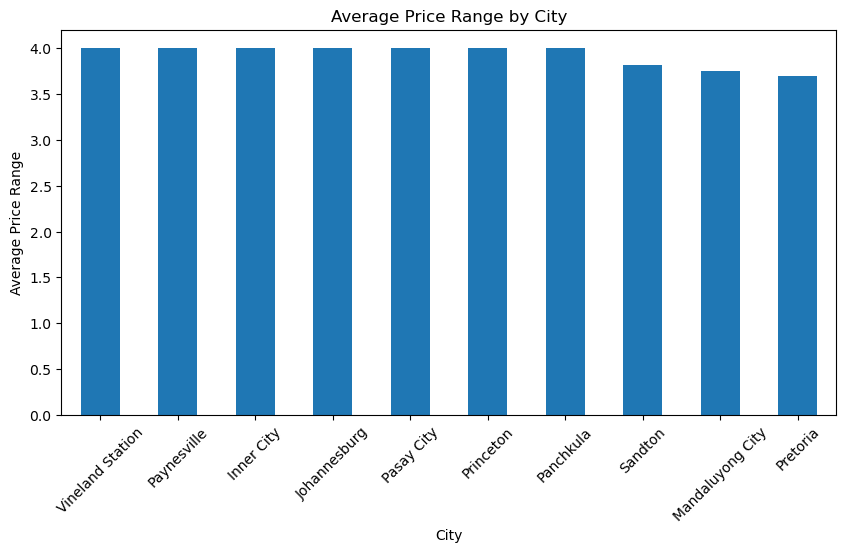

In [33]:
plt.figure(figsize=(10,5))
avg_price_city.head(10).plot(kind='bar')
plt.title('Average Price Range by City')
plt.xlabel('City')
plt.ylabel('Average Price Range')
plt.xticks(rotation=45)
plt.show()

## Latitude-Longitude Visualization

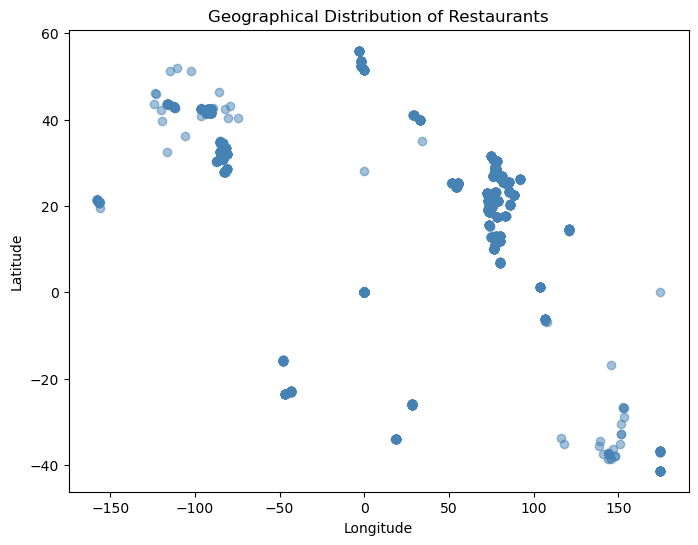

In [34]:
plt.figure(figsize=(8,6))

plt.scatter(
    df['Longitude'],
    df['Latitude'],
    color='steelblue',
    alpha=0.5
)

plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Key Insights

- Restaurant distribution is highly concentrated in a few major cities, indicating
  higher competition and market saturation in metropolitan areas.
- Cities with the highest number of restaurants do not always have the highest
  average ratings, suggesting quality varies with competition.
- Pricing patterns differ significantly across cities, reflecting variations in
  customer spending capacity and market positioning.
- Geographical distribution highlights clustering of restaurants in urban regions,
  reinforcing the influence of location on business density.
